In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/Data/auto.csv')

In [4]:
data.head()  #show first rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data.info()   #show columns info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [6]:
#convert object to number
data = data.apply(lambda horsepower:pd.to_numeric(horsepower, errors='coerce'))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          0 non-null      float64
dtypes: float64(5), int64(4)
memory usage: 28.0 KB


In [8]:
data.describe().T   #describe data

,count,mean,std,min,25%,50%,75%,max
mpg,397.0,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6
cylinders,397.0,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0
displacement,397.0,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.0,93.5,126.0,230.0
weight,397.0,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0
acceleration,397.0,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8
year,397.0,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0
origin,397.0,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0
name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.corr()['mpg']  #data correlation between features and mpg

mpg             1.000000
cylinders      -0.776260
displacement   -0.804443
horsepower     -0.778427
weight         -0.831739
acceleration    0.422297
year            0.581469
origin          0.563698
name                 NaN
Name: mpg, dtype: float64

# Visualisation

In [10]:
sns.set(rc={'figure.figsize':[8,8]}, font_scale = 1.2)

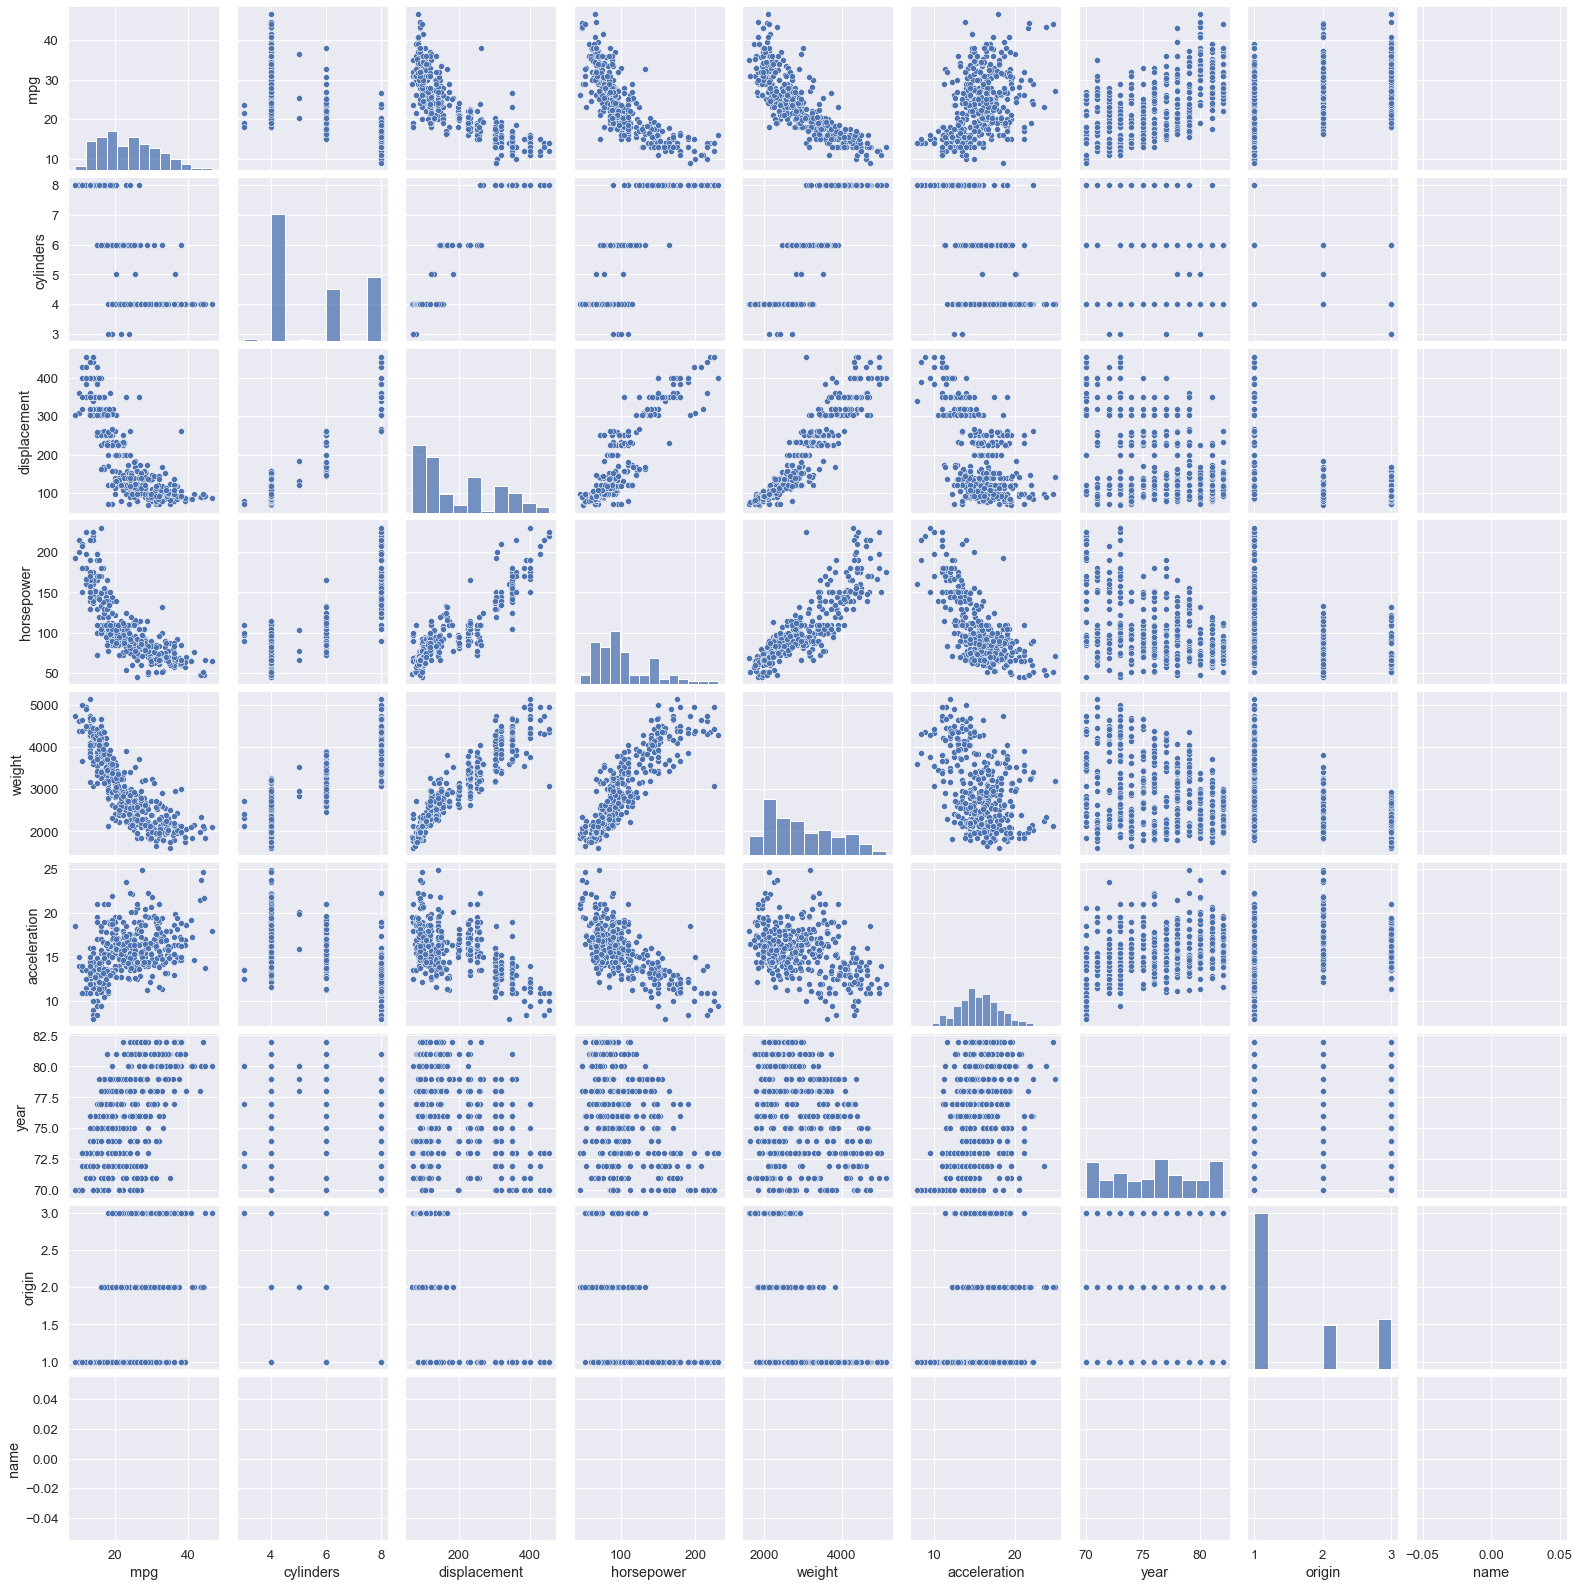

In [11]:
sns.pairplot(data)

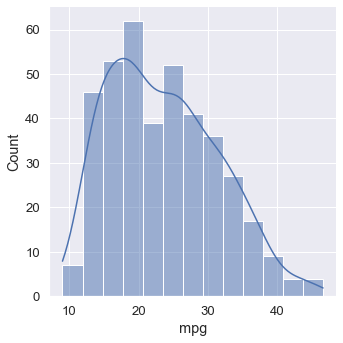

In [12]:
sns.displot(data['mpg'], kde=True)

<AxesSubplot:>

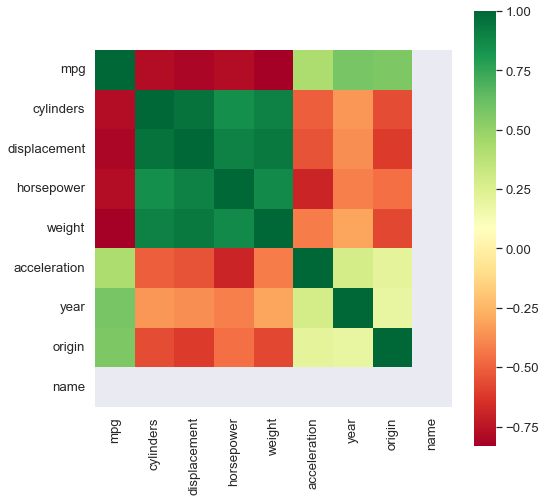

In [13]:
# Plotting the heatmap
sns.heatmap(data.corr(), square=True, cmap='RdYlGn')

# Data Processing

## Data Cleaning

In [14]:
data.isnull().sum()     #check if data contain null value

mpg               0
cylinders         0
displacement      0
horsepower        5
weight            0
acceleration      0
year              0
origin            0
name            397
dtype: int64

In [15]:
data = data[data['horsepower'].notna()]

In [16]:
data.isnull().sum()     #recheck if data contain null value

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
year              0
origin            0
name            392
dtype: int64

In [17]:
# remove name 
data.drop('name',axis = 1,inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
#Initialize X
X = data.drop('mpg', axis=1)
X.head()


,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [19]:
X.shape

(392, 7)

In [20]:
#Initialize y
y = data['mpg']
y.head()
y.shape

(392,)

# Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

In [22]:
# Create Ridge Regression object with the default parameters
r = Ridge()

In [23]:
## Fit the ridge regression
r.fit(X, y)

Ridge()

In [24]:
## Access the intercept
r.intercept_

-17.19591867210738

In [25]:
## Access the coefficients
r.coef_

array([-0.48766469,  0.01973747, -0.01682864, -0.00647685,  0.08058275,
        0.75062291,  1.41586743])

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lreg = LinearRegression()

In [28]:
lreg.fit(X,y)

LinearRegression()

In [29]:
## Access the intercept
lreg.intercept_

-17.218434622017522

In [30]:
## Access the coefficients
lreg.coef_

array([-0.49337632,  0.01989564, -0.01695114, -0.00647404,  0.08057584,
        0.75077268,  1.4261405 ])

# Compare Linear and Ridge

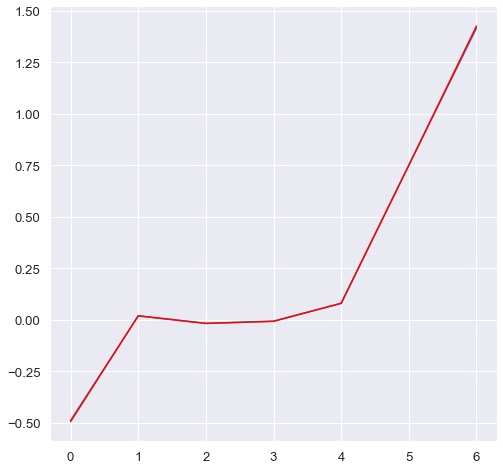

In [31]:
# plot the coefficient
plt.plot(r.coef_)
plt.plot(lreg.coef_, c = 'red')
plt.show()

In [32]:
#compare lowest coef
print(np.min(r.coef_), np.min(lreg.coef_))

-0.4876646902883478 -0.49337631885846933


Comparing Linear and Ridge Regressions 02

In [33]:
# Set fit_intercept to False
r_cent = Ridge(fit_intercept=False)

# Fit ridge regression
r_cent.fit(X, y)

Ridge(fit_intercept=False)

In [34]:
r_cent.intercept_

0.0

In [35]:
r_cent.coef_

array([-0.69773549,  0.02169253, -0.0394052 , -0.00603619, -0.07934113,
        0.58360448,  1.30037776])

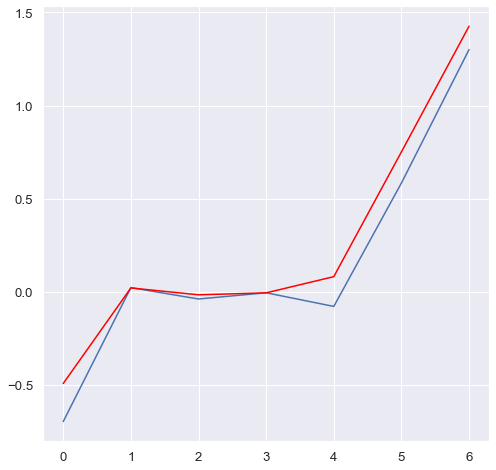

In [36]:
## Plot the coefficients
plt.plot(r_cent.coef_)
plt.plot(lreg.coef_, c = 'red')
plt.show()

In [37]:
#compare lowest coef
print(np.min(r_cent.coef_), np.min(lreg.coef_))

-0.6977354877392083 -0.49337631885846933


# Ridge Hyper Parameter Tuning with GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [39]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-5, 2, 50)
param_grid = {'alpha': alpha_space}

In [40]:
# Instantiate ridge regression 
r_reg = Ridge(fit_intercept=False)

In [41]:
# Instantiate GridSearchCV object with 5 folds
rreg_cv = GridSearchCV(r_reg, 
                       param_grid = param_grid, 
                       cv = 5)

In [42]:
# Fit it to the data
rreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameter: {}".format(rreg_cv.best_params_)) 
print("Ridge Regression Best score is {}".format(rreg_cv.best_score_))

Tuned Ridge Regression Parameter: {'alpha': 1e-05}
Ridge Regression Best score is 0.6203988901131687


# Ridge Hyper Parameter Tuning with RandomizedSearch

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Setup the distribution grid grid
alpha_space = np.logspace(-5, 2, 50)
param_dist = {'alpha': alpha_space}

In [45]:
# Instantiate ridge regression 
rid_reg = Ridge(fit_intercept=False)

In [46]:
# Instantiate RandomizedSearchCV object with 5 folds
rid_reg_cv = RandomizedSearchCV(rid_reg, 
                          param_distributions= param_dist, 
                          cv = 5)

In [47]:
# Fit it to the data
rid_reg_cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=Ridge(fit_intercept=False),
                   param_distributions={'alpha': array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.38949549e-03,
       1.93069773e-0...
       2.68269580e-02, 3.72759372e-02, 5.17947468e-02, 7.19685673e-02,
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02])})

In [48]:
# Print the tuned parameters and score
print("Tuned Ridge regression Parameter: {}".format(rid_reg_cv.best_params_))
print("Ridge regression best score is {}".format(rid_reg_cv.best_score_))

Tuned Ridge regression Parameter: {'alpha': 1e-05}
Ridge regression best score is 0.6203988901131687


# Ridge Regression with RidgeCV

In [49]:
from sklearn.linear_model import RidgeCV

In [50]:
alpha_space = np.logspace(-5, 2, 50)

In [51]:
r_reg_loocv = RidgeCV(alphas = alpha_space, fit_intercept=False)

In [52]:
r_reg_loocv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.38949549e-03,
       1.93069773e-03, 2.68269580e-03, 3.72759372e-03, 5.17947468e-03,
       7.19685673e-03, 1.00000000e-0...
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02]),
        fit_intercept=False)

In [53]:
r_reg_loocv.best_score_

-11.711185658398

In [54]:
r_reg_loocv.alpha_

10.0

# Cross Validation with RidgeCV

In [55]:
# Fit 5-fold cross validation using RidgeCV
r_reg_cv = RidgeCV(alphas = alpha_space,
                   fit_intercept=False,
                  cv = 5)

In [56]:
r_reg_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.38949549e-03,
       1.93069773e-03, 2.68269580e-03, 3.72759372e-03, 5.17947468e-03,
       7.19685673e-03, 1.00000000e-0...
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02]),
        cv=5, fit_intercept=False)

In [57]:
# Print the tuned parameter and score
print("Tuned Ridge regression Parameter alpha is: {:.4f}".format(r_reg_cv.alpha_))
print("Ridge regression best score is: {:.4f}".format(r_reg_cv.best_score_))

Tuned Ridge regression Parameter alpha is: 0.0000
Ridge regression best score is: 0.6204


# Ridge Regression with Cross Validation and Train/Test Splitting

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
# Split the data
X_train, X_test, y_train, y_test =\
                train_test_split(X, y, 
                    test_size=0.20, 
                        random_state=10123)

In [60]:
## Fitting Ridge Regression

alpha_space = np.logspace(-5, 2, 50)
param_grid = {'alpha': alpha_space}

# Create Regression object
ridge_final = Ridge(fit_intercept=False)

# Tune to find the best parameter
ridge_final_cv = GridSearchCV(ridge_final, 
                          param_grid = param_grid, 
                          cv = 5, 
                          refit = True)

In [61]:
# Fit the model on the train set
ridge_final_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(fit_intercept=False),
             param_grid={'alpha': array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.38949549e-03,
       1.93069773e-03, 2.68269580e-0...
       2.68269580e-02, 3.72759372e-02, 5.17947468e-02, 7.19685673e-02,
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02])})

In [62]:
# Make Predictions
preds = ridge_final_cv.predict(X_test)

In [63]:
# Score the results
print("The R^2 of the ridge regression is: {:0.4f}".\
      format(ridge_final_cv.score(X_test, y_test)))

The R^2 of the ridge regression is: 0.7938


In [66]:
# Score the model with RMSE 
print("The RMSE is: {:.4f}".format(np.sqrt(mean_squared_error(preds, y_test))))

The RMSE is: 3.6464
